<a href="https://colab.research.google.com/github/harshitraj21/AspireNex/blob/main/Movie_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE RATING PREDICTION



---



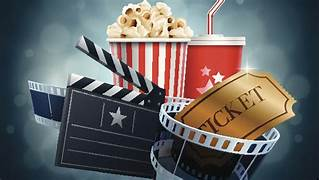
---




### The goal of this project is to predict movie ratings using machine learning techniques in Python, leveraging a dataset sourced from IMDb.com that includes all Indian movies available on the platform. This project involves data cleaning, exploratory data analysis (EDA), feature engineering, model selection, training, and evaluation. The insights and predictions derived from this project will provide valuable trends and patterns within the Indian movie industry, helping to understand factors that influence movie ratings and popularity.
### Steps to be followed:-
* Data Collection
* Data Cleaning
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Model Selection and Training
* Model Evaluation and Prediction

In [ ]:
!unzip "drive/MyDrive/Movie_rating/movie.zip" -d "drive/MyDrive/Movie_rating/"

Archive:  drive/MyDrive/Movie_rating/movie.zip
  inflating: drive/MyDrive/Movie_rating/IMDb Movies India.csv  


## Import the important libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# This is for removing the warnings which may come while execution
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import plotly.express as px
colors = ['#008B8B']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Read the data from csv file

In [ ]:
data = pd.read_csv('drive/MyDrive/Movie_rating/IMDb Movies India.csv', encoding = 'latin-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
data.shape

(15509, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# Function to find the percentage of missing values (Null) in the data
def missing_values(df):
  missing_val = df.isna().sum()
  missing_data_in_percent = (missing_val/len(df)*100).round(2)
  data_missing = pd.DataFrame({'Missing Values':missing_val, 'Percentage(%)':missing_data_in_percent})
  return data_missing

In [ ]:
missing_values(data)

,Missing Values,Percentage(%)
Name,0,0.00
Year,528,3.40
Duration,8269,53.32
Genre,1877,12.10
Rating,7590,48.94
Votes,7589,48.93
Director,525,3.39
Actor 1,1617,10.43
Actor 2,2384,15.37
Actor 3,3144,20.27


In [ ]:
missing_counts = data.isnull().sum(axis=1)

# Filter the DataFrame to include only rows with 5 or fewer missing values
data = data[missing_counts <= 5]

In [ ]:
data.dropna(subset = ["Rating", "Votes", "Duration"], inplace = True)

In [ ]:
missing_values(data)

,Missing Values,Percentage(%)
Name,0,0.00
Year,0,0.00
Duration,0,0.00
Genre,31,0.53
Rating,0,0.00
Votes,0,0.00
Director,1,0.02
Actor 1,75,1.28
Actor 2,117,2.00
Actor 3,163,2.79


In [ ]:
data.dropna(subset = ["Actor 1", "Actor 2", "Actor 3"], inplace=True)

In [ ]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)

In [ ]:
data.dropna(subset = ["Director"], inplace=True)

In [ ]:
missing_values(data)

,Missing Values,Percentage(%)
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [ ]:
duplicate = data.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate[:10]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,(2019),110 min,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,Drama,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,(2005),142 min,Romance,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,...Yahaan,(2005),142 min,War,7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
8,?: A Question Mark,(2012),82 min,Mystery,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
# Drop duplicates
data = data.drop_duplicates(subset=['Name'], keep=False)

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
30,15 Park Avenue,(2005),116 min,Drama,7.1,"1,002",Aparna Sen,Shabana Azmi,Konkona Sen Sharma,Rahul Bose
32,15th August,(1993),168 min,Drama,5.6,15,Vicky Ranawat,Ronit Roy,Tisca Chopra,Shakti Kapoor


In [ ]:
len(data)

1564

## Some Observations we can make from above:
* The year column has the year value enclosed within the brackets. So we need to remove the brackets and convert them to integer data.
* The Duration column has the duration with min written alongside.
* The votes column has the votes mentioned in numbered but it has comma present in it.

Hence we will remove all these issues and convert them to numeric data

In [ ]:
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True).astype(int)
data['Duration'] = data['Duration'].str.replace(r' min', '', regex=True).astype(int)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1564 entries, 1 to 15493
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1564 non-null   object 
 1   Year      1564 non-null   int64  
 2   Duration  1564 non-null   int64  
 3   Genre     1564 non-null   object 
 4   Rating    1564 non-null   float64
 5   Votes     1564 non-null   int64  
 6   Director  1564 non-null   object 
 7   Actor 1   1564 non-null   object 
 8   Actor 2   1564 non-null   object 
 9   Actor 3   1564 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 134.4+ KB


## Sort the data by year

In [ ]:
data.sort_values(by=["Year"], inplace=True, ascending=True)
data.Year.head(20)

4171     1931
9035     1932
11138    1933
2843     1934
2232     1935
2862     1935
4021     1935
9378     1935
3780     1935
6673     1935
6087     1935
894      1936
6542     1936
12471    1936
11603    1936
6674     1936
9368     1936
4893     1937
4246     1937
12430    1937
Name: Year, dtype: int64

## Let's visualize some data

In [ ]:
def plot_histogram(X, nbins, Title_plot, titleX, titleY):
  plot_data = px.histogram(data,
                           x = X,
                           histnorm='probability density',
                           nbins = nbins,
                           color_discrete_sequence = colors)

  plot_data.update_traces(selector=dict(type='histogram'))

  plot_data.update_layout(title=Title_plot,
                          title_x=0.5,
                          title_font = dict(size=20),
                          xaxis_title = titleX,
                          yaxis_title = titleY,
                          bargap=0.02,
                          plot_bgcolor = 'white')

  plot_data.show()

In [ ]:
plot_histogram("Year", 25, "Distribution of Year", "Year", "Probability Desnsity")

In [ ]:
plot_histogram("Rating", 30, "Distribution of Rating", "Rating", "Probability Desnsity")

In [ ]:
plot_histogram("Duration", 30, "Distribution of Duration", "Duration", "Probability Desnsity")

In [ ]:
plot_histogram("Votes", 30, "Distribution of Votes", "Votes", "Probability Desnsity")

## As you can see the histogram is not a good one for votes. We will try something else.

In [ ]:
px.scatter(data, x = 'Rating', y = 'Votes', color = 'Rating', title = 'Rating Versus Votes')

In [ ]:
px.scatter(data, x = 'Rating', y = 'Duration', color = 'Duration', title = 'Rating Versus Duration')

In [ ]:
px.scatter(data, x = 'Rating', y = 'Genre', color = 'Genre', title = 'Rating Versus Genre')

In [ ]:
px.scatter(data, x = 'Duration', y = 'Votes', color = 'Votes', title = 'Duration Versus Votes')

In [ ]:
px.scatter(data, x = 'Year', y = 'Votes', color = 'Votes', title = 'Year Versus Votes')

In [ ]:
px.scatter(data, x = 'Year', y = 'Rating', color = 'Rating', title = 'Year Versus Rating')

In [ ]:
data['Genre_mean_rating'] = data.groupby('Genre')['Rating'].transform('mean')
data['Director_enc'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor1_enc'] = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor2_enc'] = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor3_enc'] = data.groupby('Actor 3')['Rating'].transform('mean')

In [ ]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_enc,Actor1_enc,Actor2_enc,Actor3_enc
4171,Draupadi,1931,124,Drama,5.3,6,Bhagwati Prasad Mishra,Khalil,Ermeline,Jillo,6.403106,5.300,5.3,5.30,5.35
9035,Maya Machhindra,1932,154,Drama,5.8,13,Shantaram Rajaram Vankudre,Govindrao Tembe,Durga Khote,Master Vinayak,6.403106,6.400,5.8,6.75,5.80
11138,Puran Bhagat,1933,159,Drama,6.5,10,Debaki Bose,Choudhury Mohammed Rafiq,M. Kumar,Anwari,6.403106,6.720,6.5,6.45,6.50
2843,Chandidas,1934,128,Drama,6.6,5,Nitin Bose,K.L. Saigal,Umasashi,Pahadi Sanyal,6.403106,6.475,6.9,6.60,6.60
2232,Bhikharan,1935,143,Drama,6.2,9,Premankur Atorthy,Rattan Bai,Master Vinayak,I.A. Hafizji,6.403106,6.300,6.3,6.20,6.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi,6.403106,9.400,9.4,9.40,9.40
8691,Main Mulayam Singh Yadav,2021,120,Biography,4.2,118,Suvendu Ghosh,Amyth Sethi,Govind Namdeo,Mukesh Tiwari,5.750000,4.200,4.2,4.20,3.85
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar,6.333333,9.300,9.3,9.30,9.30
9510,Mosagallu,2021,85,Drama,7.9,1059,Jeffrey Gee Chin,Vishnu Manchu,Kajal Aggarwal,Sunil Shetty,6.403106,7.900,7.9,7.90,7.90


## Remove the left over textual data

In [ ]:
data.drop(["Name", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3"], axis = 1, inplace=True)

### We can see the irregularities in index. So, let's reset the index

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data

,Year,Duration,Rating,Votes,Genre_mean_rating,Director_enc,Actor1_enc,Actor2_enc,Actor3_enc
0,1931,124,5.3,6,6.403106,5.300,5.3,5.30,5.35
1,1932,154,5.8,13,6.403106,6.400,5.8,6.75,5.80
2,1933,159,6.5,10,6.403106,6.720,6.5,6.45,6.50
3,1934,128,6.6,5,6.403106,6.475,6.9,6.60,6.60
4,1935,143,6.2,9,6.403106,6.300,6.3,6.20,6.30
...,...,...,...,...,...,...,...,...,...
1559,2021,93,9.4,18,6.403106,9.400,9.4,9.40,9.40
1560,2021,120,4.2,118,5.750000,4.200,4.2,4.20,3.85
1561,2021,65,9.3,467,6.333333,9.300,9.3,9.30,9.30
1562,2021,85,7.9,1059,6.403106,7.900,7.9,7.90,7.90


In [ ]:
X = data.drop(["Rating"], axis =1 )
y = data["Rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test)

(1251, 313)

## Let's build the model

In [ ]:
# Create evaluation function (the competition uses RMSLE)

def rmsle(y_test, y_pred):
    '''
    We have to find root mean sqaured log error, that's why weare finding root of (mean_squared_log_error)
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
              "Test MAE": mean_absolute_error(y_test, test_pred),
              "Training MSE": mean_squared_error(y_train, train_pred),
              "Test MSE": mean_squared_error(y_test, test_pred),
              "Training RMSLE": rmsle(y_train, train_pred),
              "Test RMSLE": rmsle(y_test, test_pred),
              "Training R2": r2_score(y_train, train_pred),
              "Test R2": r2_score(y_test, test_pred)}
    return scores

# 1. Linear Regression Model

In [ ]:
np.random.seed(42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg_pred = lin_reg.predict(X_test)

In [ ]:
show_scores(lin_reg)

{'Training MAE': 0.27475179325576765,
 'Test MAE': 0.24149849772525198,
 'Training MSE': 0.15009699202790916,
 'Test MSE': 0.12322061693820369,
 'Training RMSLE': 0.06367658089145624,
 'Test RMSLE': 0.05360186526876062,
 'Training R2': 0.9257347822957113,
 'Test R2': 0.9344042379473465}

# 2. Random Forest Regressor

In [ ]:
np.random.seed(42)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
show_scores(rf_reg)

{'Training MAE': 0.07684092725819403,
 'Test MAE': 0.16972204472843483,
 'Training MSE': 0.017879520383693028,
 'Test MSE': 0.09604570287539918,
 'Training RMSLE': 0.021925893519518586,
 'Test RMSLE': 0.04715987851638043,
 'Training R2': 0.9911535437465906,
 'Test R2': 0.9488706417112475}

## Hyperparameter Tuning of Random Forest Regressor using RandomizedSearchCV

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_depth": [None, 3, 5, 10],
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [1000, 2000, 3000]}

rs_RF_model = RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions= rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)

rs_RF_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000, 2000, 3000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_RF_model.best_params_

{'n_estimators': 860,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_samples': 1000,
 'max_features': 0.5,
 'max_depth': 10}

In [ ]:
show_scores(rs_RF_model)

{'Training MAE': 0.1949384074368113,
 'Test MAE': 0.19685341320091,
 'Training MSE': 0.09972246706827029,
 'Test MSE': 0.11072380376094355,
 'Training RMSLE': 0.053245534690669144,
 'Test RMSLE': 0.05360160348352108,
 'Training R2': 0.9506591662712548,
 'Test R2': 0.9410568420647494}

## Hyperparameter Tuning of Random Forest Regressor using GridSearchCV

In [ ]:
rf_grid2 = {"n_estimators": [100, 1000],
          "min_samples_split": [1, 3, 4],
          "min_samples_leaf": [2, 4],
          "max_depth": [None, 3],
          "max_features": ["sqrt", "auto"],
          "max_samples": [100, 500]}

gs_RF_model = GridSearchCV(RandomForestRegressor(),
                           param_grid= rf_grid2,
                           cv=3,
                           verbose=True)

gs_RF_model.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 3],
                         'max_features': ['sqrt', 'auto'],
                         'max_samples': [100, 500], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [1, 3, 4],
                         'n_estimators': [100, 1000]},
             verbose=True)

In [ ]:
gs_RF_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 500,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [ ]:
show_scores(gs_RF_model)

{'Training MAE': 0.15162365701090044,
 'Test MAE': 0.17766784978954497,
 'Training MSE': 0.06816079498966822,
 'Test MSE': 0.09944921840101895,
 'Training RMSLE': 0.04331618030410259,
 'Test RMSLE': 0.04908854511175167,
 'Training R2': 0.9662752983226748,
 'Test R2': 0.9470588004779494}

# 3. XGB Regressor

In [ ]:
xgb_model = XGBRegressor(objective = 'reg:squarederror', gamma = 0.09, learning_rate = 0.06, subsample = 0.6, n_estimators = 100)

In [ ]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.09, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test)

In [ ]:
show_scores(xgb_model)

{'Training MAE': 0.11975042940043719,
 'Test MAE': 0.19110919522782105,
 'Training MSE': 0.032920477005030785,
 'Test MSE': 0.0995090981218242,
 'Training RMSLE': 0.029200450288537075,
 'Test RMSLE': 0.049186598345497,
 'Training R2': 0.9837115563831349,
 'Test R2': 0.9470269238649659}

## Hyperparameter Tuning of XGBRegressor using RandomizedSearchCV

In [ ]:
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5)
}

# Create an XGBRegressor model
xgb_rs = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform RandomizedSearchCV
xgb_RS = RandomizedSearchCV(xgb_rs, param_distributions=param_dist,
                                   n_iter=100, scoring='neg_mean_squared_error',
                                   cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the random search model
xgb_RS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d39df670a90>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d39df6729b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d39e37f2800>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d39df672800>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
xgb_RS.best_params_

{'colsample_bytree': 0.8293468158094726,
 'gamma': 0.08146721354071484,
 'learning_rate': 0.03117062422012895,
 'max_depth': 9,
 'min_child_weight': 2,
 'n_estimators': 177,
 'subsample': 0.8182017987230057}

In [ ]:
xgb_RS_pred = xgb_RS.predict(X_test)

In [ ]:
show_scores(xgb_RS)

{'Training MAE': 0.08781423553478994,
 'Test MAE': 0.18960183070490538,
 'Training MSE': 0.018170984567560323,
 'Test MSE': 0.10086413859112485,
 'Training RMSLE': 0.022236917811458076,
 'Test RMSLE': 0.04887085358315256,
 'Training R2': 0.9910093326549794,
 'Test R2': 0.9463055761359529}

# 4. GradientBoostingRegressor

In [ ]:
np.random.seed(42)

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
show_scores(gbr_model)

{'Training MAE': 0.18399675419230507,
 'Test MAE': 0.221892649261834,
 'Training MSE': 0.07146745203788306,
 'Test MSE': 0.11366374013404357,
 'Training RMSLE': 0.04294084350484785,
 'Test RMSLE': 0.0540904245510542,
 'Training R2': 0.9646392255257367,
 'Test R2': 0.9394917844342027}

## Hyperparameter Tuning of GradientBoostingRegressor using RandomizedSearchCV

In [ ]:
gbr_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a GradientBoostingRegressor model
rs_gbr = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV
gbr_RS = RandomizedSearchCV(rs_gbr,
                            param_distributions = gbr_grid,
                            n_iter=100,
                            scoring='neg_mean_squared_error',
                            cv=3,
                            verbose=1,
                            random_state=42,
                            n_jobs=-1)

# Fit the random search model
gbr_RS.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d39df4fad10>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d39e390e050>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min...df4fb3d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d39df4fbd30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d39df4fb340>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d39df4fabc0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
gbr_RS.best_params_

{'learning_rate': 0.07504273197594735,
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 103,
 'subsample': 0.7921571559615501}

In [ ]:
show_scores(gbr_RS)

{'Training MAE': 0.024886061074545766,
 'Test MAE': 0.18675864507661574,
 'Training MSE': 0.001279900241362088,
 'Test MSE': 0.09849023708619505,
 'Training RMSLE': 0.005547343153412094,
 'Test RMSLE': 0.04813003348883695,
 'Training R2': 0.9993667290144839,
 'Test R2': 0.9475693084733092}

## Train a model with the best hyperparamters

1. RandomizedSearchCV Random Forest

In [ ]:
np.random.seed(42)
ideal_model_rs_RF = RandomForestRegressor(n_estimators = 860,
                                   min_samples_leaf = 9,
                                   min_samples_split = 18,
                                   max_features = 0.5,
                                   n_jobs = -1,
                                   max_depth = 10,
                                   max_samples = 1000)

ideal_model_rs_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=1000,
                      min_samples_leaf=9, min_samples_split=18,
                      n_estimators=860, n_jobs=-1)

In [ ]:
show_scores(ideal_model_rs_RF)

{'Training MAE': 0.1939130175411087,
 'Test MAE': 0.19706658340397187,
 'Training MSE': 0.09911769858153481,
 'Test MSE': 0.11088862436106531,
 'Training RMSLE': 0.05307016418679726,
 'Test RMSLE': 0.05368364916380808,
 'Training R2': 0.9509583945417304,
 'Test R2': 0.9409691007992403}

2. GridSearchCV Random Forest

In [ ]:
np.random.seed(42)
ideal_model_gs_RF = RandomForestRegressor(max_depth = None,
                                          max_features = 'auto',
                                          max_samples = 500,
                                          min_samples_leaf = 2,
                                          min_samples_split = 3,
                                          n_estimators = 1000)

ideal_model_gs_RF.fit(X_train, y_train)

RandomForestRegressor(max_features='auto', max_samples=500, min_samples_leaf=2,
                      min_samples_split=3, n_estimators=1000)

In [ ]:
show_scores(ideal_model_gs_RF)

{'Training MAE': 0.1521791848108835,
 'Test MAE': 0.17812322772453248,
 'Training MSE': 0.06859613126664955,
 'Test MSE': 0.09966353639279538,
 'Training RMSLE': 0.04335932643516379,
 'Test RMSLE': 0.049261250604746135,
 'Training R2': 0.966059901978299,
 'Test R2': 0.9469447095705875}

3. RandomizedSearchCV XGBRegressor

In [ ]:
np.random.seed(42)
ideal_model_rs_xgb = XGBRegressor(colsample_bytree = 0.8293468158094726,
                                  gamma = 0.08146721354071484,
                                  learning_rate = 0.03117062422012895,
                                  max_depth = 9,
                                  min_child_weight = 2,
                                  n_estimators = 177,
                                  subsample = 0.8182017987230057)

ideal_model_rs_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8293468158094726, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.08146721354071484,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03117062422012895,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=177, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
show_scores(ideal_model_rs_xgb)

{'Training MAE': 0.08843420922136802,
 'Test MAE': 0.19255771560790821,
 'Training MSE': 0.018451417540150707,
 'Test MSE': 0.10383193663687494,
 'Training RMSLE': 0.022547555401050055,
 'Test RMSLE': 0.04934494471093515,
 'Training R2': 0.9908705796028395,
 'Test R2': 0.9447256865097957}

4. RandomizedSearchCV GradientBoostingRegressor

In [ ]:
np.random.seed(42)

ideal_model_rs_gbr = GradientBoostingRegressor(learning_rate = 0.07504273197594735,
                                               max_depth = 9,
                                               max_features = 'log2',
                                               min_samples_leaf = 1,
                                               min_samples_split = 6,
                                               n_estimators = 103,
                                               subsample = 0.7921571559615501)

ideal_model_rs_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.07504273197594735, max_depth=9,
                          max_features='log2', min_samples_split=6,
                          n_estimators=103, subsample=0.7921571559615501)

In [ ]:
show_scores(ideal_model_rs_gbr)

{'Training MAE': 0.024886061074545766,
 'Test MAE': 0.18675864507661574,
 'Training MSE': 0.001279900241362088,
 'Test MSE': 0.09849023708619505,
 'Training RMSLE': 0.005547343153412094,
 'Test RMSLE': 0.04813003348883695,
 'Training R2': 0.9993667290144839,
 'Test R2': 0.9475693084733092}

## Feature Importance
### Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [ ]:
# Find feature importance of our best model
rf_reg.feature_importances_

array([0.0042136 , 0.00467358, 0.00498504, 0.0021765 , 0.4631257 ,
       0.03681574, 0.11992197, 0.36408787])

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "features_importances": importances})
         .sort_values("features_importances", ascending=False)
         .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["features_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importances")
    ax.invert_yaxis()

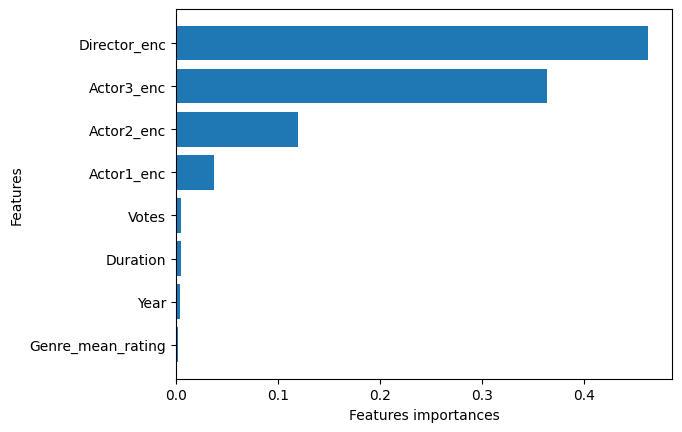

In [ ]:
plot_features(X_train.columns, rf_reg.feature_importances_)

***CONCLUSION***
## In this project, we successfully predicted movie ratings using a dataset of Indian movies from IMDb, achieving a high R² score of 94.89% with the RandomForestRegressor model. Through comprehensive data preprocessing, including handling missing values and encoding categorical features, we prepared the dataset for analysis. Our exploratory data analysis revealed insightful trends, such as the influence of specific directors, actors, and genres on movie ratings. By employing RandomizedSearchCV for hyperparameter tuning, we optimized the RandomForestRegressor model, resulting in superior predictive accuracy. This project's outcome underscores the model's robustness and its potential application in predicting movie ratings, providing valuable insights into the factors influencing movie success.